<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Temporal_Series_Estationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling in Python
### We'll work with a stock ticker dataset from Yahoo finance that we'll download through the yfinance library.

In [2]:
!pip install -q yfinance

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 14.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [34]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
start_date = datetime(2005, 1, 1)
end_date = datetime(2021, 1, 1)
df = yf.download('SPY', start=start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


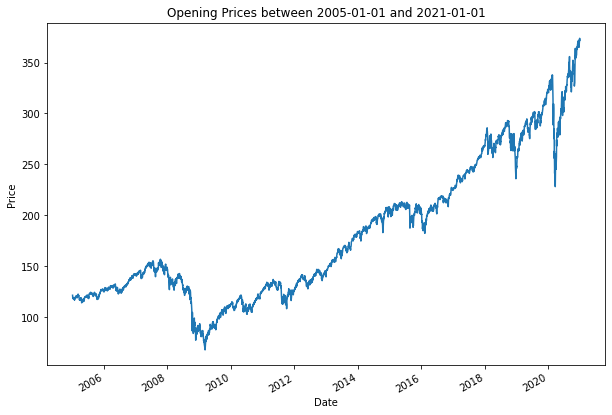

In [9]:
plt.figure(figsize=(10,7))
plt.title('Opening Prices between {} and {}'.format(
    start_date.date().isoformat(),
    end_date.date().isoformat()))
df['Open'].plot()
plt.ylabel('Price')
plt.xlabel('Date');

In [10]:
# resample the data to weekly data and make each year consistent
df1 = df.reset_index().resample('W', on="Date")['Open'].mean()
df1 = df1[df1.index.week < 53]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# statsmodels can use the frequency information associated with the DateTimeIndex;
# however, this is often not set and df1.index.freq is None
df1 = df1.asfreq('W').fillna(method='ffill')

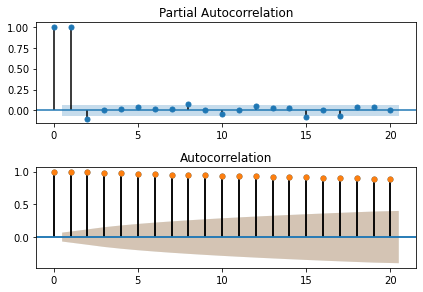

In [17]:
# autocorrelation and partial autocorrelation functions
# These graphs show the correlation of the time-series with itself 
# at lags of up to 20 time steps
# fig, axs = plt.subplots(2)
fig.tight_layout()
sm.graphics.tsa.plot_pacf(df1, lags=20, ax=axs[0])
sm.graphics.tsa.plot_acf(df1, lags=20, ax=axs[1])

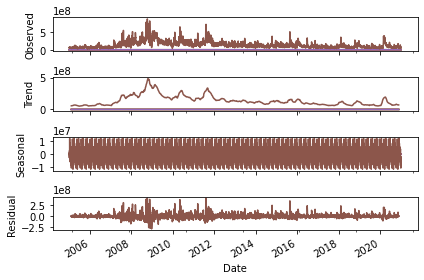

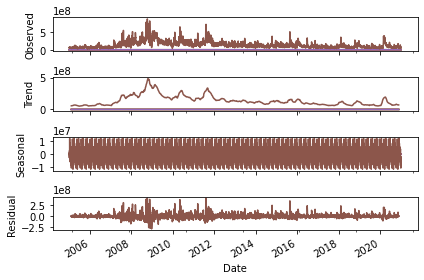

In [23]:
# look  at seasonality and trend from the time-series
result = seasonal_decompose(df, model='additive', freq=54)
result.plot()

In [24]:
# checking stationarity
!pip install arch -q
from arch.unitroot import KPSS, ADF
ADF(df1)

     |████████████████████████████████| 902 kB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 39.3 MB/s 


Test Statistic,1.325
P-value,0.997
Lags,9


We can reject our null hypotesis, the model is weekness estationary

In [27]:
# next we'll use another library to test again
!pip install pmdarima -q
from pmdarima.arima.utils import ndiffs
# ADF Test:
print(ndiffs(df1, test='adf'))

1


In [39]:
# use ARIMA method
import statsmodels as sms
mod = sms.api.tsa.ARIMA(endog=df1, order=(1, 0, 0))
res = mod.fit()
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:                   Open   No. Observations:                  834
Model:                     ARMA(1, 0)   Log Likelihood               -2257.710
Method:                       css-mle   S.D. of innovations              3.611
Date:                Tue, 03 May 2022   AIC                           4521.421
Time:                        20:05:37   BIC                           4535.599
Sample:                    01-09-2005   HQIC                          4526.857
                         - 12-27-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        232.7147    104.739      2.222      0.027      27.430     437.999
ar.L1.Open     0.9995      0.001   1565.758      0.000       0.998       1.001
                                    Roots           